In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter
import nltk
from nltk.stem.snowball import SnowballStemmer

import string
from nltk import wordpunct_tokenize

from wordcloud import WordCloud


import re

#progress bar
from tqdm import tqdm, tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

### Scommentare se si usano i dati iniziali

In [ ]:
'''dataReviewsChunk = pd.read_json('../data/reviews.json', lines=True, chunksize=10000)'''

In [ ]:
'''dataReviews'''

In [ ]:
'''
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataReviewsChunk:

    chunk_list.append(chunk)
'''

In [ ]:
#dataReviews = pd.concat(chunk_list)

In [ ]:
## elimino recensioni non verificate e quelli con helpfull == 0

In [ ]:
'''def convert_to_int(field):
    return field["$numberInt"]'''

In [ ]:
'''dataReviews["rating"]=dataReviews["rating"].apply(convert_to_int).astype(int)'''

In [ ]:
'''dataReviews["helpful"]=dataReviews["helpful"].apply(convert_to_int).astype(int)'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["verified"] == True]'''

In [ ]:
'''len(dataReviews.loc[dataReviews["verified"] == False])'''

In [ ]:
'''len(dataReviews.loc[dataReviews["helpful"] == 0]) - len(dataReviews.loc[dataReviews["helpful"] != 0])'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["helpful"] != 0]
dataReviews'''

### Dati filtrati (vedi sopra)

In [2]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [3]:
dataReviews

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
0,R5U4GZKVIS0NK,B07DMJPV31,Senza senso,AEAA3VFD6LCE3MCQIICUMVPBQOLQ,stefano,2018-10-20,1,65,True,Non ho mai scritto una recensione in vita mia ...
1,RSJ27FXLJ5Z7B,B07DMJPV31,Sconsiglio caldamente l'acquisto di questo gioco!,AEAQMQQBWG2YVT5VOAVLAQ2O3EHQ,Lorenzo Di Benedetto,2018-10-13,1,32,True,Uno dei peggiori se non il peggior gioco Fifa ...
2,R1JAIU95UEJC3Z,B07DMJPV31,"Penoso, irreale,la difesa ancora peggio degli ...",AG6DCZNMEZJR2RDKQMNLKBTUD43Q,Damiano,2018-10-27,1,21,True,La EA non sa proprio cosa sia un gioco di calc...
3,RQJ5C2HTKCDWT,B07DMJPV31,Stesso gioco stesso MINESTRONE!!!!!,AHEV4SQXLEKOHXOW3JATQPGD2ATQ,Johnny30Master,2018-10-23,2,17,True,Aspettavo questo momento!!!! Comunque partiamo...
4,R3SBWLGWQPO8W3,B07DMJPV31,Ci sta,AE7JPUM5DKPJIF25Y6UX5DJO662Q,Manu,2018-10-02,5,19,True,"Regalato a mio figlio, commento nel titolo, ci..."
...,...,...,...,...,...,...,...,...,...,...
1988834,R1105W76H2IGV0,B07ND2K124,Gran trovata!,AE56LWKNGMOU64NN4Z6OJL6GB25Q,Davide,2019-03-04,5,1,True,"Prodotto arrivato nei termini prestabiliti,non..."
1988838,R3LU4EX10F2IZ0,B07NKF55V6,Simili alle AirPods ma non identiche,AHBQIU62223TBIWUMA34DFE6WVBQ,MenteTech,2019-04-12,5,3,True,Queste cuffie hanno un design simile a quelle ...
1988839,R1MRC39RV2U7AD,B07NKF55V6,funziona,AF2MZFZ7HFBERTIYOVXNB2ZP24RA,Erik D Law,2019-04-08,5,1,True,"A questo prezzo è difficile trovare di meglio,..."
1988840,R109OLAJOC4RRE,B07PX9K6Q8,Cuffie wireless top,AFEKWKK3TGY6W4FAGBYBEAQGQ4CQ,Giuseppe,2019-04-07,5,1,True,Queste cuffie sono veramente molto performanti...


In [4]:
counts = dataReviews["rating"].value_counts()

In [5]:
counts.values

array([215539,  65647,  44671,  31161,  20653], dtype=int64)

In [6]:
x = counts._index
print(x)
y = counts.values
print(y)

Int64Index([5, 4, 1, 3, 2], dtype='int64')
[215539  65647  44671  31161  20653]


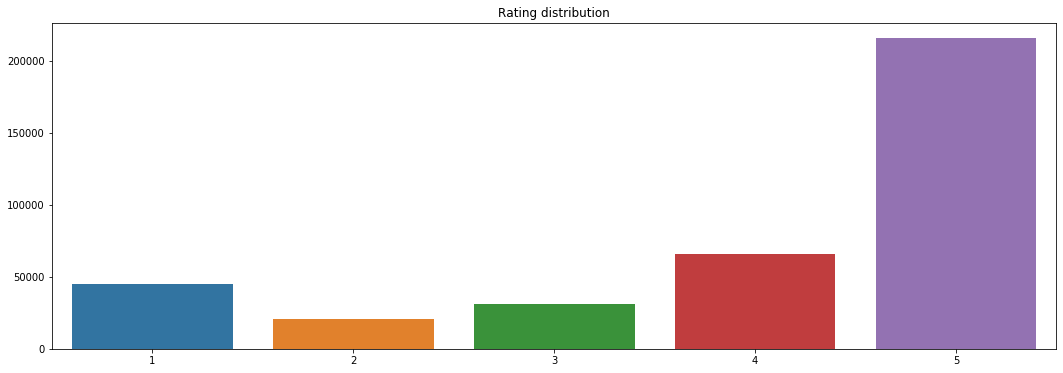

In [7]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [8]:
print("Proportion of review with score=1: {}%".format(len(dataReviews[dataReviews.rating == 1]) / len(dataReviews)*100))
print("Proportion of review with score=2: {}%".format(len(dataReviews[dataReviews.rating == 2]) / len(dataReviews)*100))
print("Proportion of review with score=3: {}%".format(len(dataReviews[dataReviews.rating == 3]) / len(dataReviews)*100))
print("Proportion of review with score=4: {}%".format(len(dataReviews[dataReviews.rating == 4]) / len(dataReviews)*100))
print("Proportion of review with score=5: {}%".format(len(dataReviews[dataReviews.rating == 5]) / len(dataReviews)*100))

Proportion of review with score=1: 11.828019625547103%
Proportion of review with score=2: 5.468516248268996%
Proportion of review with score=3: 8.2508320734184%
Proportion of review with score=4: 17.3820600469721%
Proportion of review with score=5: 57.07057200579341%


In [9]:
# recensioni vuote
dataReviews[dataReviews["body"].str.len() == 0]

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body


In [10]:
dataReviews.loc[dataReviews['rating'] == 3 , 'polarity'] = 'neutral'
dataReviews.loc[dataReviews['rating'] > 3 , 'polarity'] = 'positive'
dataReviews.loc[dataReviews['rating'] < 3 , 'polarity'] = 'negative'

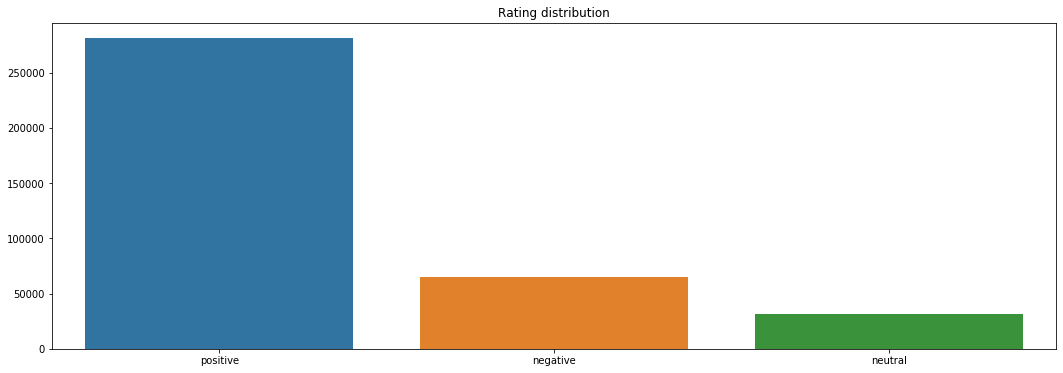

In [11]:
counts = dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [16]:
def undersampling(df):
    positive, negative, _ = df.polarity.value_counts()
    df_positive = df[df.polarity == 'positive']
    df_positive = df_positive.sample(negative, random_state=1)
    df_negative = df[df.polarity == 'negative']
    df = pd.concat([df_positive, df_negative])
    #df = df.sample(frac=1)
    return df

In [17]:
new_dataReviews = undersampling(dataReviews)

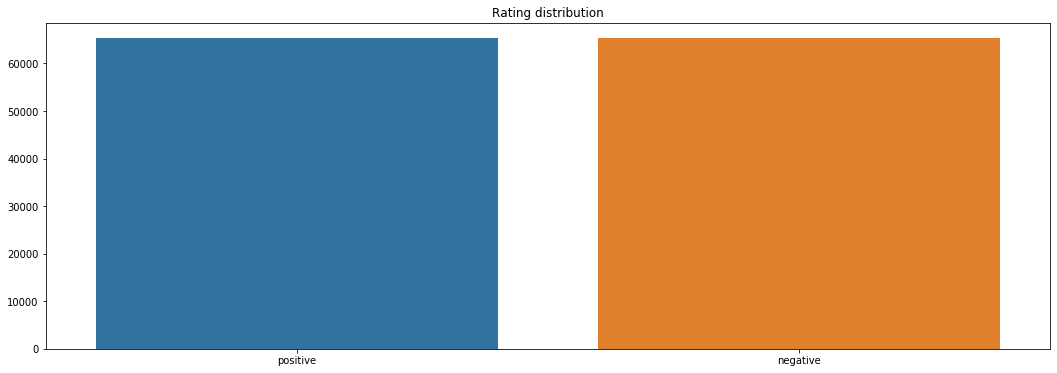

In [18]:
counts = new_dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

### Funzioni varie

In [35]:
def flat_list(l):
    return  [item for sublist in l for item in sublist]

In [36]:
def plot_common_tokens(tokens, title, n=20):
    sentences = (list(itertools.chain(tokens)))
    flat_sentences = flat_list(sentences)
    counts = Counter(flat_sentences)
    #print(counts.most_common(30))
    common_words = [word[0] for word in counts.most_common(n)]
    common_counts = [word[1] for word in counts.most_common(n)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.show()

In [37]:
def word_Cloud(sentences):
    flat_sentences = flat_list(sentences)
    unique_string=(" ").join(flat_sentences)

    wordcloud = WordCloud(background_color="white").generate(unique_string)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Tokenizzazione

In [19]:
new_dataReviews['token']=new_dataReviews['body'].progress_apply(word_tokenize)


 21%|███████████████▍                                                         | 27660/130648 [00:14<00:54, 1878.67it/s]


 40%|█████████████████████████████                                            | 52081/130648 [00:28<00:46, 1688.41it/s]


 59%|██████████████████████████████████████████▉                              | 76950/130648 [00:42<00:31, 1697.85it/s]


 77%|███████████████████████████████████████████████████████▍                | 100678/130648 [00:57<00:19, 1552.67it/s]


 93%|██████████████████████████████████████████████████████████████████▊     | 121277/130648 [01:11<00:06, 1394.66it/s]


100%|████████████████████████████████████████████████████████████████████████| 130648/130648 [01:18<00:00, 1671.25it/s]


In [21]:
#new_dataReviews['token'] #Name: token, Length: 130648, dtype: object

1613456    [Ho, iniziato, ad, assumere, biotina, per, un,...
569115     [cercavo, un, prodotto, ecologico, efficace, m...
143329     [``, Un, bel, libro, ,, Marcus, ,, non, si, va...
1466423    [Sono, molto, contento, del, prodotto, riguard...
91853      [Dopo, la, corretta, installazione, la, tastie...
                                 ...                        
1600576    [Telo, preso, per, la, mia, Captiva, come, lun...
577486     [Veramente, un, ottimo, prodotto, per, il, pre...
1723914    [Ho, comprato, questa, altalena, da, montare, ...
934576     [l'idea, è, favolosa, ma, a, parer, mio, inges...
1415921    [Perfette, per, la, mia, Canon, MG, 3550, ., S...
Name: token, Length: 130648, dtype: object

### Stopwords

In [94]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [24]:
new_dataReviews["cleaned"] = new_dataReviews["token"].progress_apply(lambda sentence : [word for word in sentence if word.lower() not in stop_words])


 61%|████████████████████████████████████████████▉                            | 80318/130648 [00:14<00:09, 5047.62it/s]


100%|████████████████████████████████████████████████████████████████████████| 130648/130648 [00:25<00:00, 5113.88it/s]


### Punctuation

In [118]:
punctuation = string.punctuation
punctuation = punctuation + "..."+ "''" + "``" + "--"+ ".."
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~...''``--..


In [43]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if word not in punctuation])


100%|██████████████████████████████████████████████████████████████████████| 130648/130648 [00:01<00:00, 106224.58it/s]


### Numbers

In [119]:
regex_numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'

In [30]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [re.sub(regex_numbers,"",word) for word in sentence if re.sub(regex_numbers,"",word) != ""])


 93%|███████████████████████████████████████████████████████████████████     | 121683/130648 [00:14<00:01, 6906.65it/s]


100%|████████████████████████████████████████████████████████████████████████| 130648/130648 [00:16<00:00, 8042.65it/s]


### Eliminazione token di lunghezza 1

In [31]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if len(word)> 1])


100%|██████████████████████████████████████████████████████████████████████| 130648/130648 [00:01<00:00, 122408.72it/s]


In [33]:
new_dataReviews.to_csv("dati_puliti.csv")

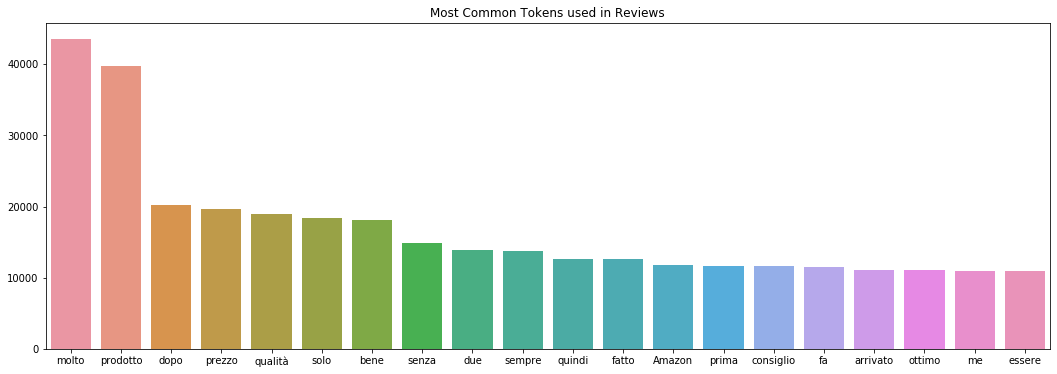

In [45]:
plot_common_tokens(new_dataReviews['cleaned'],'Most Common Tokens used in Reviews')

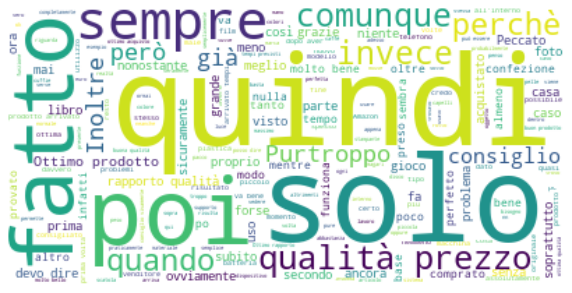

In [47]:
word_Cloud(new_dataReviews["cleaned"])

In [44]:
sentences = (list(itertools.chain(new_dataReviews["cleaned"])))
flat_sentences = flat_list(sentences)
counts = Counter(flat_sentences)
counts.most_common()

[('molto', 43584),
 ('prodotto', 39809),
 ('dopo', 20215),
 ('prezzo', 19749),
 ('qualità', 18971),
 ('solo', 18390),
 ('bene', 18162),
 ('senza', 14974),
 ('due', 13934),
 ('sempre', 13784),
 ('quindi', 12670),
 ('fatto', 12636),
 ('Amazon', 11811),
 ('prima', 11723),
 ('consiglio', 11644),
 ('fa', 11520),
 ('arrivato', 11160),
 ('ottimo', 11111),
 ('me', 11056),
 ('essere', 10961),
 ('stato', 10704),
 ('poco', 10699),
 ('dire', 10639),
 ('po', 10462),
 ('fare', 10211),
 ('volta', 9980),
 ('già', 9866),
 ('quando', 9779),
 ('acquistato', 9576),
 ('tempo', 9424),
 ('davvero', 9210),
 ('problema', 9139),
 ('troppo', 8741),
 ('funziona', 8628),
 ('altri', 8463),
 ('poi', 8392),
 ('può', 8273),
 ('parte', 8261),
 ('ben', 8154),
 ('meno', 7982),
 ('cosa', 7832),
 ('utilizzo', 7733),
 ('giorni', 7401),
 ('perchè', 7357),
 ("l'ho", 7299),
 ('Ottimo', 7295),
 ('mai', 7251),
 ('confezione', 7239),
 ('così', 7166),
 ('foto', 7149),
 ('ogni', 7090),
 ('ancora', 7079),
 ('volte', 7067),
 ('qualch

### Stemming

In [125]:
stemmer = SnowballStemmer("italian")
def stemming_token(sentence,stemmer):
    stem = []
    for elem in sentence:
        stem.append(stemmer.stem(elem))
    return stem

In [49]:
new_dataReviews["stemming"]=[stemming_token(row["cleaned"], stemmer) for _, row in tqdm(new_dataReviews.iterrows())]


0it [00:00, ?it/s]
1it [00:00,  3.62it/s]
68it [00:00,  5.17it/s]
160it [00:00,  7.36it/s]
267it [00:00, 10.48it/s]
376it [00:00, 14.91it/s]
498it [00:00, 21.17it/s]
595it [00:00, 29.97it/s]
698it [00:01, 42.28it/s]
790it [00:01, 59.11it/s]
880it [00:01, 82.04it/s]
969it [00:01, 111.98it/s]
1054it [00:01, 149.59it/s]
1163it [00:01, 201.83it/s]
1260it [00:01, 264.48it/s]
1361it [00:01, 339.69it/s]
1459it [00:01, 422.31it/s]
1554it [00:01, 506.74it/s]
1649it [00:02, 589.19it/s]
1750it [00:02, 673.32it/s]
1847it [00:02, 740.94it/s]
1944it [00:02, 773.22it/s]
2038it [00:02, 812.45it/s]
2135it [00:02, 851.91it/s]
2234it [00:02, 889.03it/s]
2330it [00:02, 905.31it/s]
2426it [00:02, 888.29it/s]
2540it [00:02, 951.30it/s]
2643it [00:03, 970.87it/s]
2756it [00:03, 1012.86it/s]
2862it [00:03, 1024.85it/s]
2977it [00:03, 1030.42it/s]
3082it [00:03, 1003.46it/s]
3184it [00:03, 982.22it/s] 
3283it [00:03, 938.85it/s]
3381it [00:03, 950.11it/s]
3477it [00:03, 949.35it/s]
3573it [00:04, 890.63it/s]


47938it [01:05, 680.47it/s]
48023it [01:05, 721.93it/s]
48109it [01:05, 756.47it/s]
48186it [01:05, 738.60it/s]
48261it [01:05, 681.29it/s]
48333it [01:05, 690.55it/s]
48404it [01:05, 688.18it/s]
48474it [01:06, 691.62it/s]
48544it [01:06, 607.38it/s]
48623it [01:06, 651.03it/s]
48694it [01:06, 665.79it/s]
48763it [01:06, 670.96it/s]
48832it [01:06, 666.70it/s]
48900it [01:06, 660.93it/s]
48967it [01:06, 659.64it/s]
49046it [01:06, 690.41it/s]
49121it [01:07, 703.01it/s]
49206it [01:07, 739.75it/s]
49281it [01:07, 713.21it/s]
49362it [01:07, 737.70it/s]
49437it [01:07, 709.78it/s]
49509it [01:07, 702.31it/s]
49592it [01:07, 736.28it/s]
49667it [01:07, 723.20it/s]
49740it [01:07, 723.17it/s]
49820it [01:07, 744.62it/s]
49895it [01:08, 741.72it/s]
49970it [01:08, 675.86it/s]
50064it [01:08, 736.34it/s]
50141it [01:08, 718.94it/s]
50220it [01:08, 732.72it/s]
50299it [01:09, 273.29it/s]
50362it [01:09, 329.21it/s]
50433it [01:09, 391.04it/s]
50512it [01:09, 456.87it/s]
50589it [01:09, 520.

68411it [02:15, 198.22it/s]
68432it [02:15, 162.82it/s]
68450it [02:15, 156.29it/s]
68467it [02:15, 145.09it/s]
68483it [02:15, 138.42it/s]
68498it [02:15, 124.29it/s]
68519it [02:16, 140.31it/s]
68535it [02:16, 140.62it/s]
68553it [02:16, 150.04it/s]
68569it [02:16, 150.65it/s]
68589it [02:16, 156.88it/s]
68606it [02:16, 155.32it/s]
68622it [02:16, 143.27it/s]
68639it [02:16, 147.68it/s]
68655it [02:16, 150.56it/s]
68673it [02:17, 157.40it/s]
68697it [02:17, 175.04it/s]
68716it [02:17, 150.90it/s]
68735it [02:17, 160.60it/s]
68757it [02:17, 172.01it/s]
68776it [02:17, 168.64it/s]
68794it [02:17, 169.08it/s]
68812it [02:17, 163.07it/s]
68829it [02:17, 163.45it/s]
68846it [02:18, 155.86it/s]
68864it [02:18, 161.24it/s]
68883it [02:18, 167.75it/s]
68903it [02:18, 174.85it/s]
68925it [02:18, 183.35it/s]
68945it [02:18, 185.03it/s]
68964it [02:18, 182.15it/s]
68983it [02:18, 168.28it/s]
69001it [02:18, 162.47it/s]
69019it [02:19, 163.56it/s]
69036it [02:19, 158.93it/s]
69058it [02:19, 170.

81548it [03:26, 233.58it/s]
81576it [03:26, 241.01it/s]
81603it [03:26, 247.04it/s]
81628it [03:26, 214.93it/s]
81651it [03:26, 167.97it/s]
81670it [03:26, 171.35it/s]
81694it [03:26, 186.91it/s]
81722it [03:26, 206.89it/s]
81745it [03:27, 200.62it/s]
81771it [03:27, 213.16it/s]
81802it [03:27, 234.34it/s]
81827it [03:27, 236.29it/s]
81863it [03:27, 263.28it/s]
81891it [03:27, 248.82it/s]
81918it [03:27, 247.17it/s]
81951it [03:27, 265.88it/s]
81979it [03:27, 253.59it/s]
82006it [03:28, 240.57it/s]
82031it [03:28, 205.44it/s]
82053it [03:28, 182.87it/s]
82073it [03:28, 153.99it/s]
82091it [03:28, 151.96it/s]
82125it [03:28, 182.08it/s]
82158it [03:28, 210.01it/s]
82183it [03:29, 204.35it/s]
82207it [03:29, 206.30it/s]
82242it [03:29, 234.44it/s]
82269it [03:29, 237.75it/s]
82295it [03:29, 237.28it/s]
82322it [03:29, 245.71it/s]
82353it [03:29, 261.69it/s]
82381it [03:29, 249.90it/s]
82407it [03:29, 248.49it/s]
82433it [03:29, 241.34it/s]
82461it [03:30, 250.07it/s]
82487it [03:30, 241.

95910it [04:38, 170.91it/s]
95930it [04:38, 176.09it/s]
95951it [04:39, 180.10it/s]
95971it [04:39, 179.81it/s]
95990it [04:39, 159.52it/s]
96008it [04:39, 154.99it/s]
96025it [04:39, 157.18it/s]
96042it [04:39, 149.39it/s]
96059it [04:39, 150.48it/s]
96075it [04:39, 143.05it/s]
96109it [04:40, 172.82it/s]
96138it [04:40, 195.39it/s]
96161it [04:40, 199.32it/s]
96184it [04:40, 191.61it/s]
96205it [04:40, 184.63it/s]
96225it [04:40, 172.40it/s]
96246it [04:40, 181.64it/s]
96265it [04:40, 177.41it/s]
96288it [04:40, 185.85it/s]
96308it [04:41, 183.39it/s]
96327it [04:41, 180.74it/s]
96346it [04:41, 173.80it/s]
96365it [04:41, 177.21it/s]
96385it [04:41, 179.96it/s]
96404it [04:41, 168.63it/s]
96422it [04:41, 152.20it/s]
96438it [04:41, 132.98it/s]
96457it [04:42, 145.59it/s]
96475it [04:42, 153.54it/s]
96497it [04:42, 168.25it/s]
96515it [04:42, 163.28it/s]
96538it [04:42, 178.31it/s]
96557it [04:42, 157.33it/s]
96576it [04:42, 163.61it/s]
96594it [04:42, 168.11it/s]
96612it [04:42, 158.

108387it [05:48, 164.02it/s]
108407it [05:48, 172.22it/s]
108429it [05:48, 182.03it/s]
108448it [05:49, 184.10it/s]
108467it [05:49, 169.58it/s]
108487it [05:49, 177.13it/s]
108506it [05:49, 168.88it/s]
108526it [05:49, 173.30it/s]
108544it [05:49, 167.28it/s]
108561it [05:49, 163.65it/s]
108578it [05:49, 162.14it/s]
108600it [05:49, 175.49it/s]
108618it [05:50, 137.74it/s]
108641it [05:50, 149.56it/s]
108658it [05:50, 143.78it/s]
108680it [05:50, 159.39it/s]
108698it [05:50, 162.28it/s]
108722it [05:50, 179.66it/s]
108752it [05:50, 202.33it/s]
108775it [05:50, 187.00it/s]
108796it [05:51, 173.77it/s]
108820it [05:51, 188.54it/s]
108845it [05:51, 202.96it/s]
108868it [05:51, 207.20it/s]
108893it [05:51, 214.22it/s]
108916it [05:51, 216.96it/s]
108939it [05:51, 201.01it/s]
108960it [05:51, 202.70it/s]
108981it [05:52, 161.66it/s]
108999it [05:52, 146.13it/s]
109016it [05:52, 133.66it/s]
109031it [05:52, 137.23it/s]
109046it [05:52, 137.15it/s]
109063it [05:52, 141.07it/s]
109078it [05:5

120258it [06:55, 145.31it/s]
120276it [06:55, 152.78it/s]
120293it [06:55, 155.16it/s]
120313it [06:55, 163.50it/s]
120336it [06:55, 178.74it/s]
120358it [06:55, 188.90it/s]
120378it [06:55, 189.65it/s]
120398it [06:56, 181.41it/s]
120424it [06:56, 197.81it/s]
120445it [06:56, 196.43it/s]
120466it [06:56, 172.21it/s]
120492it [06:56, 176.00it/s]
120511it [06:56, 153.74it/s]
120528it [06:56, 139.51it/s]
120543it [06:56, 119.65it/s]
120566it [06:57, 139.03it/s]
120582it [06:57, 140.19it/s]
120598it [06:57, 140.46it/s]
120614it [06:57, 138.57it/s]
120629it [06:57, 124.30it/s]
120651it [06:57, 141.92it/s]
120669it [06:57, 149.69it/s]
120686it [06:57, 138.75it/s]
120705it [06:58, 150.04it/s]
120721it [06:58, 133.31it/s]
120736it [06:58, 113.80it/s]
120763it [06:58, 137.26it/s]
120781it [06:58, 142.54it/s]
120798it [06:58, 137.16it/s]
120814it [06:58, 119.47it/s]
120828it [06:59, 124.31it/s]
120846it [06:59, 136.30it/s]
120867it [06:59, 149.63it/s]
120884it [06:59, 153.60it/s]
120901it [06:5

In [ ]:
#new_dataReviews = pd.read_csv("../data/dati_finali.csv", sep=",", index_col=0)

In [37]:
### da fare solo se si legge il csv finale

In [32]:
#def str_to_list(sentence):
#   return ast.literal_eval(sentence)

In [34]:
#import ast

#new_dataReviews["stemming"] = new_dataReviews["stemming"].progress_apply(str_to_list)

100%|████████████████████████████████████████████████████████████████████████| 130648/130648 [00:38<00:00, 3351.34it/s]


In [4]:
len(new_dataReviews)

130648

### CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [71]:
count_vect = CountVectorizer(stop_words=None, lowercase=True)
#lowercase = true -> Convert all characters to lowercase before tokenizing.
#stop_words = None -> If None, no stop words will be used
bow = count_vect.fit(new_dataReviews['stemming'].apply(lambda x: " ".join(x)))

In [427]:
import pickle
with open('bow.bin', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [428]:
with open('bow.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    bow2 = pickle.load(f)

In [148]:
count_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [73]:
bow.get_feature_names()[::2000]

['__',
 'alors',
 'artes',
 'bbxnkjp',
 'cacciav',
 'ciarraciarr',
 'consigliat',
 'dator',
 'distribuzione',
 'equivoc',
 'findus',
 'giacenz',
 'ic',
 'innerv',
 'krup',
 'maic',
 'mircof',
 'noooo',
 'pantaloncino',
 'piumon',
 'prodoot',
 'readid',
 'rincors',
 'sbarrett',
 'seth',
 'sostituitecel',
 'strettissim',
 'testing',
 'umido',
 'vostro']

In [75]:
#X_train, X_test, y_train, y_test = train_test_split(bow, new_dataReviews['polarity'], test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(new_dataReviews['stemming'].apply(lambda x: " ".join(x)), new_dataReviews['polarity'], test_size=0.2, random_state=1)    

In [413]:
print("train size: ",len(X_train))
print("test size:",len(X_test))

train size:  104518
test size: 26130


In [59]:
print("y train distribution:\n",y_train.value_counts())
print("y train distribution:\n",y_test.value_counts())

y train distribution:
 negative    52311
positive    52207
Name: polarity, dtype: int64
y train distribution:
 positive    13117
negative    13013
Name: polarity, dtype: int64


In [77]:
model = LogisticRegression()
model.fit(bow.transform(X_train), y_train)

C:\Users\gabriele.ferrario\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [429]:
predictions = model.predict(bow2.transform(X_test))

In [430]:
predictions

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [431]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

0.8980482204362802

In [82]:
confusion_matrix(y_test, predictions)

array([[11683,  1330],
       [ 1334, 11783]], dtype=int64)

In [188]:
def clean_sentence(sentence):
    tokens = word_tokenize(sentence)
    tokens_clean = []
    for word in tokens:
        if word.lower() not in stop_words and word.lower() not in punctuation and not word.isnumeric() and len(word)> 1:
            
            tokens_clean.append(stemmer.stem(word))
    return ' '.join(tokens_clean)

In [422]:
sentence="belle le scarpe e le stringhe per il colore , però sono comode"

In [405]:
clean_sentence(sentence)

'bell scarp string pecc color cost alto per comod'

In [406]:
print(bow.transform([clean_sentence(sentence)]))

  (0, 2071)	1
  (0, 6147)	1
  (0, 10864)	1
  (0, 11068)	1
  (0, 12995)	1
  (0, 36611)	1
  (0, 36930)	1
  (0, 46294)	1
  (0, 52027)	1


In [424]:
model.predict(bow.transform([clean_sentence(sentence)]))

array(['positive'], dtype=object)

In [425]:
import pickle
with open('model.bin', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [426]:
with open('model.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [423]:
data.predict(bow.transform([clean_sentence(sentence)]))

array(['positive'], dtype=object)

### Sentimenti recensioni neutre

In [193]:
dataReviews_neutre = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [197]:
dataReviews_neutre = dataReviews_neutre.loc[dataReviews_neutre["rating"]==3]

In [198]:
dataReviews_neutre

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
7,R28E0GUD4PS31C,B07DMJPV31,La qualità senza novità...,AFCW44RM6DXVUF72GCZ5YO2SK7CA,Cristian,2018-10-06,3,9,True,"Comprate 3 copie, una per me, è le altre due p..."
24,RQFZV0CX34RO,B07DMJPV31,Comprato unicamente per giocare in multi gioca...,AFNTZDOBIT4YY7WSLM5XN2SUCLEA,Lorenzo B,2018-10-25,3,1,True,Come da titolo.\nL ho trovato pregno di difett...
51,R2965ISJKXT6VW,B07DMJPV31,Troppo ma troppo Arcade,AFY6KOT2S6T2YOAUMC3W7JGBRGOQ,stefano,2018-10-15,3,1,True,Spedizione Day one perfetta.... Gioco purtropp...
67,R3U6AVF7LC5340,B07DMJPV31,Giù di bestemmie,AHZWSG4W6BX2CK2TVVDUHQD74PJA,Gianluca,2018-10-25,3,1,True,"Il gioco più o meno è sempre lo stesso, cambia..."
91,R1EE955TRECDIR,B07DMJPV31,Il miglior gioco di calcio in commercio pero’...,AFQNXIT5XIZBKHLKXKAHGSBDPZSQ,ChryLightblue,2018-10-03,3,24,True,Eccomi qua a recensire questo grandissimo gioc...
...,...,...,...,...,...,...,...,...,...,...
1988234,R3N93VT7FFHHCI,B07GJL45FQ,Insomma,AH37MZUMA5LIA2UYB72FPML6Z36A,Cliente Amazon,2018-11-18,3,6,True,Non toglie proprio tutti i peli...bisogna fini...
1988351,R1IIBD6NXL10UX,B076HQX9HD,Difettoso,AFYKXY42ILTMK5UNXQJTYM5NQ5DA,Cliente Amazon,2019-01-31,3,2,True,Buona qualità del tessuto. Originale. Purtropp...
1988494,R2IH699YYJ4AQQ,B06XWNYQCP,Può andare,AFSNA3BNIOCTQF2D4EQSKDDRFZGA,Xhuljana,2018-09-05,3,4,True,La uso sempre. L'avrei preferita più grande ma...
1988514,R1N8JBLKGBF04Q,B06XKMM62C,funzionale e bel design ma un po’ troppo pesante,AGQS576TKQ2HCBTTDU3Y7UYX7U6A,Helen6,2018-09-29,3,1,True,ho preso quella color metallo. bella e tiene p...


In [199]:
dataReviews_neutre["polarity"] = dataReviews_neutre["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)])))

100%|███████████████████████████████████████████████████████████████████████████| 31161/31161 [01:42<00:00, 305.09it/s]


In [200]:
dataReviews_neutre["polarity"]

7          [positive]
24         [negative]
51         [positive]
67         [positive]
91         [negative]
              ...    
1988234    [negative]
1988351    [negative]
1988494    [negative]
1988514    [positive]
1988748    [negative]
Name: polarity, Length: 31161, dtype: object

In [201]:
print("Proportion of review with score=3 that is positive: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "positive"]) / len(dataReviews_neutre)*100))
print("Proportion of review with score=3 that is negative: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "negative"]) / len(dataReviews_neutre)*100))

Proportion of review with score=3 that is positive: 47.270626744969675%
Proportion of review with score=3 that is negative: 52.72937325503033%


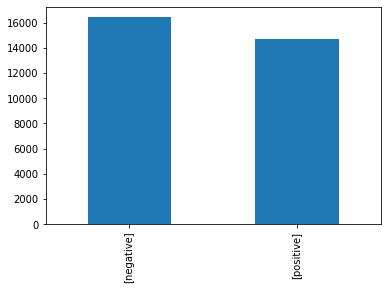

In [234]:
dataReviews_neutre["polarity"].value_counts().plot(kind="bar")


### Prodotti nel tempo

In [279]:
prod = "B00DDPI5NS"
dataReviews_prodotto = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)[dataReviews["product"]  == prod]

In [280]:
dataReviews_prodotto

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,6,True,Necessita di una connessione per poter giocare...
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,3,True,Impeccabile la consegna amazon. Ho giocato the...
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,4,True,"Gioco meraviglioso, unisce le componenti steal..."
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,3,True,Il gioco a parer mio è molto bello e curato e ...
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,2,True,Dall' e3 pareva una vera rivoluzione degli Ope...
...,...,...,...,...,...,...,...,...,...,...
988063,R2171VMWTANC0S,B00DDPI5NS,marketing,AHDJU7LTDELTMHSPWWEHTRF535JQ,fabio,2016-04-06,1,1,True,il gioco è molto bello ma ti costringe a pagar...
988064,RVW49UXZGWWXG,B00DDPI5NS,Destiny?,AHZWHWPJFBRZNQOABKAQGRU6N2CA,Incorruptible,2016-05-21,1,2,True,"Non capisco la moda del copia e incolla, sfrut..."
988065,R1ASW4R7DJB46J,B00DDPI5NS,Buttare soldi in inutilita' fa male.,AFHDW73YKEX4ZS7D3I7RRXAAPMPQ,Cliente Amazon,2016-03-31,1,4,True,Brutto tendenzioso e fondamentalmente per gent...
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,5,True,Spedizione ottima. La data è stata rispettata....


In [317]:
from datetime import datetime
dt = datetime.strptime(dataReviews_prodotto['date'].iloc[0], '%Y-%m-%d')

In [318]:
dt

datetime.datetime(2017, 12, 14, 0, 0)

In [319]:
dataReviews_prodotto["date"] = dataReviews_prodotto["date"].progress_apply(lambda string: datetime.strptime(string, '%Y-%m-%d')) 

100%|███████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 10004.81it/s]


In [320]:
dataReviews_prodotto["date"]

987792   2017-12-14
987793   2018-08-18
987794   2018-03-08
987795   2017-03-21
987796   2017-08-11
            ...    
988063   2016-04-06
988064   2016-05-21
988065   2016-03-31
988066   2016-03-09
988070   2016-12-02
Name: date, Length: 70, dtype: datetime64[ns]

In [321]:
dataReviews_prodotto=dataReviews_prodotto.assign(
    Period=dataReviews_prodotto.date.dt.to_period('M')
)
dataReviews_prodotto

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,6,True,Necessita di una connessione per poter giocare...,2017-12
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,3,True,Impeccabile la consegna amazon. Ho giocato the...,2018-08
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,4,True,"Gioco meraviglioso, unisce le componenti steal...",2018-03
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,3,True,Il gioco a parer mio è molto bello e curato e ...,2017-03
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,2,True,Dall' e3 pareva una vera rivoluzione degli Ope...,2017-08
...,...,...,...,...,...,...,...,...,...,...,...
988063,R2171VMWTANC0S,B00DDPI5NS,marketing,AHDJU7LTDELTMHSPWWEHTRF535JQ,fabio,2016-04-06,1,1,True,il gioco è molto bello ma ti costringe a pagar...,2016-04
988064,RVW49UXZGWWXG,B00DDPI5NS,Destiny?,AHZWHWPJFBRZNQOABKAQGRU6N2CA,Incorruptible,2016-05-21,1,2,True,"Non capisco la moda del copia e incolla, sfrut...",2016-05
988065,R1ASW4R7DJB46J,B00DDPI5NS,Buttare soldi in inutilita' fa male.,AFHDW73YKEX4ZS7D3I7RRXAAPMPQ,Cliente Amazon,2016-03-31,1,4,True,Brutto tendenzioso e fondamentalmente per gent...,2016-03
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,5,True,Spedizione ottima. La data è stata rispettata....,2016-03


In [324]:
dataReviews_prodotto["polarity"] = dataReviews_prodotto["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])

100%|█████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 330.19it/s]


In [325]:
dataReviews_prodotto

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,Period,polarity
987792,RSXMNKNE6MD1T,B00DDPI5NS,Divertente e longevo sparatutto strategico!,AEQB6HIS7UXP2BWBQWXXJ77T7U4A,Ennio Corsetti,2017-12-14,4,6,True,Necessita di una connessione per poter giocare...,2017-12,positive
987793,R359K48YTMSFTM,B00DDPI5NS,A mio parere tremendo,AG4QHX4T42GVV2JPDX2EFQ2UCHCQ,Techreviewer,2018-08-18,2,3,True,Impeccabile la consegna amazon. Ho giocato the...,2018-08,negative
987794,R1EV4X602Y6BO,B00DDPI5NS,Bellissimo,AHV4TP34EEOBEVAQOWDZLUIU2TQQ,Cliente Amazon,2018-03-08,5,4,True,"Gioco meraviglioso, unisce le componenti steal...",2018-03,negative
987795,R2SE0QAP5EDIHI,B00DDPI5NS,Gioco molto bello ma purtroppo non merita le 5...,AEUMCCYQ4J3MC4INBAEILMHNZLUQ,Utente Privato,2017-03-21,4,3,True,Il gioco a parer mio è molto bello e curato e ...,2017-03,negative
987796,R2FYWZJOIVXCEB,B00DDPI5NS,Peccato,AHYK5UIPGRHQHZ5PMGDDTEMFKVWQ,Burnoverattack,2017-08-11,3,2,True,Dall' e3 pareva una vera rivoluzione degli Ope...,2017-08,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
988063,R2171VMWTANC0S,B00DDPI5NS,marketing,AHDJU7LTDELTMHSPWWEHTRF535JQ,fabio,2016-04-06,1,1,True,il gioco è molto bello ma ti costringe a pagar...,2016-04,negative
988064,RVW49UXZGWWXG,B00DDPI5NS,Destiny?,AHZWHWPJFBRZNQOABKAQGRU6N2CA,Incorruptible,2016-05-21,1,2,True,"Non capisco la moda del copia e incolla, sfrut...",2016-05,negative
988065,R1ASW4R7DJB46J,B00DDPI5NS,Buttare soldi in inutilita' fa male.,AFHDW73YKEX4ZS7D3I7RRXAAPMPQ,Cliente Amazon,2016-03-31,1,4,True,Brutto tendenzioso e fondamentalmente per gent...,2016-03,negative
988066,R2159NDFI46JOD,B00DDPI5NS,ASPETTIAMO..,AGXG4M6GPUMDJODEXUOHWBHATKBQ,Cliente Amazon,2016-03-09,3,5,True,Spedizione ottima. La data è stata rispettata....,2016-03,negative


In [334]:
dataReviews_prodotto_month = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["polarity"]=="positive"])/len(x))
#df.groupby(['ID_0', 'ID_1']).apply(lambda x: x['ID_2'].sum()/len(x)).








100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.94it/s]


Period
2016-03    0.687500
2016-04    0.000000
2016-05    0.500000
2016-06    0.000000
2016-07    1.000000
2016-08    0.000000
2016-10    1.000000
2016-11    0.500000
2016-12    0.571429
2017-01    0.000000
2017-02    0.000000
2017-03    0.500000
2017-04    0.500000
2017-05    1.000000
2017-06    0.600000
2017-07    0.500000
2017-08    0.500000
2017-10    1.000000
2017-12    1.000000
2018-02    0.000000
2018-03    0.000000
2018-05    1.000000
2018-06    0.000000
2018-08    0.000000
Freq: M, dtype: float64

In [335]:
dataReviews_prodotto_month

Period
2016-03    0.687500
2016-04    0.000000
2016-05    0.500000
2016-06    0.000000
2016-07    1.000000
2016-08    0.000000
2016-10    1.000000
2016-11    0.500000
2016-12    0.571429
2017-01    0.000000
2017-02    0.000000
2017-03    0.500000
2017-04    0.500000
2017-05    1.000000
2017-06    0.600000
2017-07    0.500000
2017-08    0.500000
2017-10    1.000000
2017-12    1.000000
2018-02    0.000000
2018-03    0.000000
2018-05    1.000000
2018-06    0.000000
2018-08    0.000000
Freq: M, dtype: float64

In [339]:
dataReviews_prodotto.loc[str(dataReviews_prodotto["date"])=="2016-05"]

KeyError: False

In [340]:
str(dataReviews_prodotto["date"])

'987792   2017-12-14\n987793   2018-08-18\n987794   2018-03-08\n987795   2017-03-21\n987796   2017-08-11\n            ...    \n988063   2016-04-06\n988064   2016-05-21\n988065   2016-03-31\n988066   2016-03-09\n988070   2016-12-02\nName: date, Length: 70, dtype: datetime64[ns]'

In [ ]:
import datetime
# considero periodi di 6 mesi
def manage_date(date):
    date= str(date)
    datee = datetime.datetime.strptime(str(date), "%Y-%m")
    six=1
    if (datee.month > 6):
        six=2
    return str(datee.year)+"-"+str(six)